In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Lấy dữ liệu
df = pd.read_csv('VN_House.csv')
dientich = np.array(df['Dien tich'])
sophong = np.array(df['So phong'])
gia = np.array(df['Gia'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14512\1241371185.py:3: RuntimeWarning: overflow encountered in exp
  return c1 * np.exp(-(dientich + sophong) * c2)


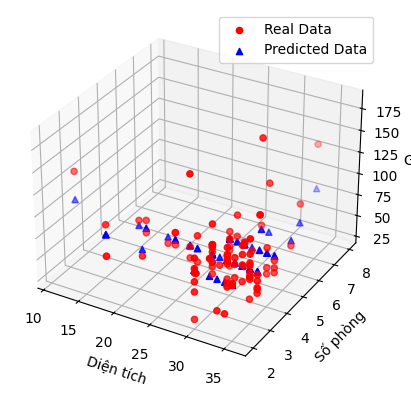

Constant C1 = 112.4595, Constant C2 = 0.0089


In [3]:
def model_func(x, c1, c2):
    dientich, sophong = x
    return c1 * np.exp(-(dientich + sophong) * c2)

# Fit dữ liệu với mô hình
popt, pcov = curve_fit(model_func, (dientich, sophong), gia)

# Tính giá trị dữ đoán từ mô hình phù hợp
predicted_gia = model_func((dientich, sophong), *popt)

# Vẽ đồ thị 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu thực tế
ax.scatter(dientich, sophong, gia, c='r', marker='o', label='Real Data')

# Vẽ dữ liệu dữ đoán từ mô hình
ax.scatter(dientich, sophong, predicted_gia, c='b', marker='^', label='Predicted Data')
ax.set_xlabel('Diện tích')
ax.set_ylabel('Số phòng')
ax.set_zlabel('Giá')
plt.legend()
plt.show()

c1_opt, c2_opt = popt
print(f'Constant C1 = {c1_opt:.4f}, Constant C2 = {c2_opt:.4f}')